In [4]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
df = pd.read_csv('00 df.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [6]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

In [9]:
error_rate = []
for i in range(1,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

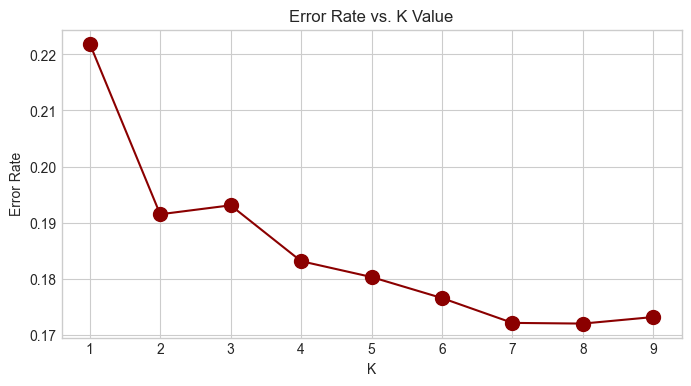

In [10]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [12]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11489   946]
 [ 1784  2062]]
accuracy: 0.8323198820711258
precision: 0.6855053191489362
recall: 0.5361414456578263
f1 score:  0.6016924423694193
